<h1 style="color:#1bffcf">
Code file for running the prediction algorithm for various business problems
</h1>

<h4 style="color:#add48a">
First, I will be importing necessary packages and loading the excel data with openpyxl
</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("/Users/jatin/Documents/Jatin/DS_Projects/MLResearch/Sales Prediction Dataset/advertising_sales_data.xlsx")

<h4 style="color:#add48a">
Getting to know more about the data I have to work with, using info() and head() pandas methods
</h4>


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
print(data.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


<h4 style="color:#add48a">
Next looking for descriptive statistics regarding the data with describe() method
</h4>


In [4]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  198.000000  200.000000  200.000000
mean   147.042500   23.260606   30.554000   15.130500
std     85.854236   14.921914   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.925000   12.750000   11.000000
50%    149.750000   22.400000   25.750000   16.000000
75%    218.825000   36.575000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


<h4 style="color:#add48a">
Data cleaning
</h4>

In [36]:
print("\n=== Data Cleaning ===")
print(f"Missing values before cleaning:\n{data.isnull().sum()}")


=== Data Cleaning ===
Missing values before cleaning:
Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


<h4 style="color:#add48a">
Drop the categorical 'Campaign' column as it's not needed for analysis
</h4>

In [42]:
data = data.drop(columns=['Campaign'])

<h4 style="color:#add48a">
Impute missing values with median
</h4>

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data[['Radio']] = imputer.fit_transform(data[['Radio']])
print(f"\nMissing values after cleaning:\n{data.isnull().sum()}")


Missing values after cleaning:
Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


<h3 style="color:#24e1a2">
1. Average amount spent on TV advertising
</h3>


In [39]:
avg_tv = data['TV'].mean()
print(f"1. Average amount spent on TV advertising: ${avg_tv:.2f}")

1. Average amount spent on TV advertising: $147.04


<h3 style="color:#24e1a2">
2. Correlation between radio advertising expenditure and product sales
</h3>


In [40]:
corr_radio_sales = data['Radio'].corr(data['Sales'])
print(f"2. Correlation between Radio ads and Sales: {corr_radio_sales:.4f}")

2. Correlation between Radio ads and Sales: 0.3496


<h3 style="color:#24e1a2">
3. Advertising medium with highest impact on sales
</h3>

In [43]:
correlations = data.corr()['Sales'].drop('Sales')
highest_impact = correlations.idxmax()
print(f"3. Advertising medium with highest impact on sales: {highest_impact} (correlation: {correlations.max():.4f})")

3. Advertising medium with highest impact on sales: TV (correlation: 0.9012)


<h3 style="color:#24e1a2">
4. Linear regression model to predict sales
</h3>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("\n=== Linear Regression Model ===")
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")


=== Linear Regression Model ===
Model Coefficients: [0.05450865 0.10099124 0.00429875]
Intercept: 4.72
Mean Squared Error: 2.90
Root Mean Squared Error: 1.70
R-squared Score: 0.9061


<h4 style="color:#add48a">
Actual vs Predicted Sales Visualisation
</h4>

Text(0.5, 1.0, 'Actual vs Predicted Sales')

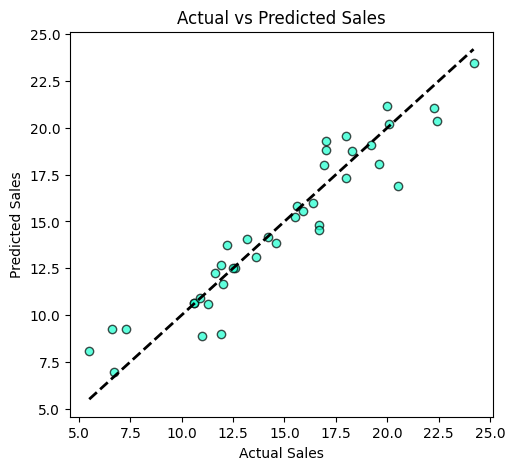

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='#1bffcf', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

<h3 style="color:#24e1a2">
5. Predict sales for given expenditures
</h3>

In [47]:
test_input = np.array([[200, 40, 50]])
predicted_sales = model.predict(test_input)[0]
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales}")

Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: 19.8715686960658


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h3 style="color:#24e1a2">
6. Effect of normalization
</h3>

In [48]:
from sklearn.preprocessing import StandardScaler

print("\n=== Effect of Normalization ===")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"With normalization - MSE: {mse_scaled:.2f}, R-squared: {r2_scaled:.4f}")
print("Note: Normalization doesn't affect linear regression performance, but helps with interpretation")


=== Effect of Normalization ===
With normalization - MSE: 2.90, R-squared: 0.9061
Note: Normalization doesn't affect linear regression performance, but helps with interpretation


<h3 style="color:#24e1a2">
7. Impact of using only Radio and Newspaper as predictors
</h3>

In [49]:
print("\n=== Impact of Reduced Predictors ===")
X_reduced = data[['Radio', 'Newspaper']]
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = LinearRegression()
model_reduced.fit(X_train_red, y_train)
y_pred_red = model_reduced.predict(X_test_red)

mse_red = mean_squared_error(y_test, y_pred_red)
r2_red = r2_score(y_test, y_pred_red)

print(f"Using only Radio & Newspaper - MSE: {mse_red:.2f}, R-squared: {r2_red:.4f}")
print("Interpretation: TV advertising has significant impact on sales prediction")


=== Impact of Reduced Predictors ===
Using only Radio & Newspaper - MSE: 27.51, R-squared: 0.1097
Interpretation: TV advertising has significant impact on sales prediction
